# An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

# In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D)

# You are required to help the manager to predict the right group of the new customers.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Upload data
df = pd.read_csv('/content/drive/My Drive/Dataset/Customer segmentation.csv')

# Data cleaning and processing

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.shape

(8068, 11)

In [ ]:
df.size

88748

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
#Check duplication
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
#Check null value
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

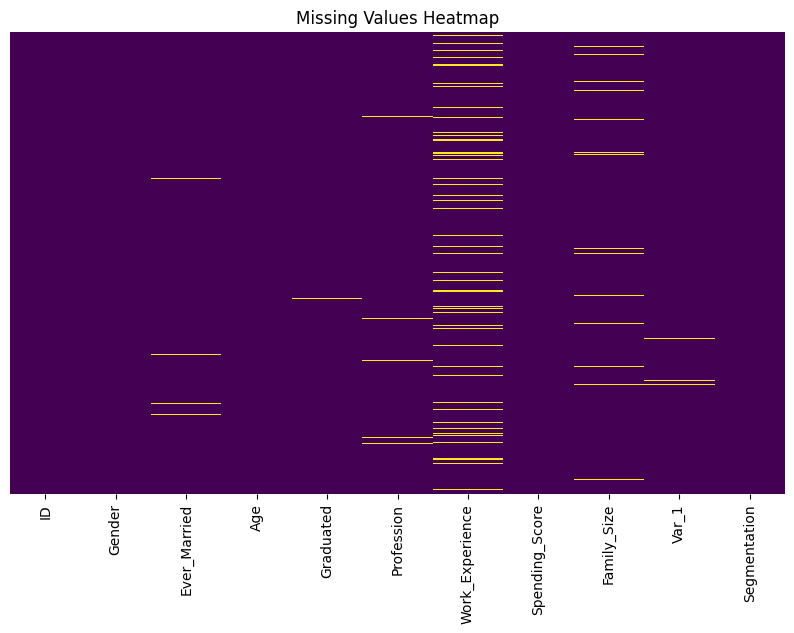

In [ ]:
# Create a DataFrame to store the information about missing values
missing_values_df = df.isnull()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_df, cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()

In [69]:
df = df.fillna(0)

In [68]:
#remove unused data
df = df.drop(['ID', 'Var_1'], axis=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8068.0,43.466906,16.711696,18.0,30.0,40.0,53.0,89.0
Work_Experience,8068.0,2.370228,3.325175,0.0,0.0,1.0,4.0,14.0
Family_Size,8068.0,2.731780,1.603485,0.0,2.0,2.0,4.0,9.0


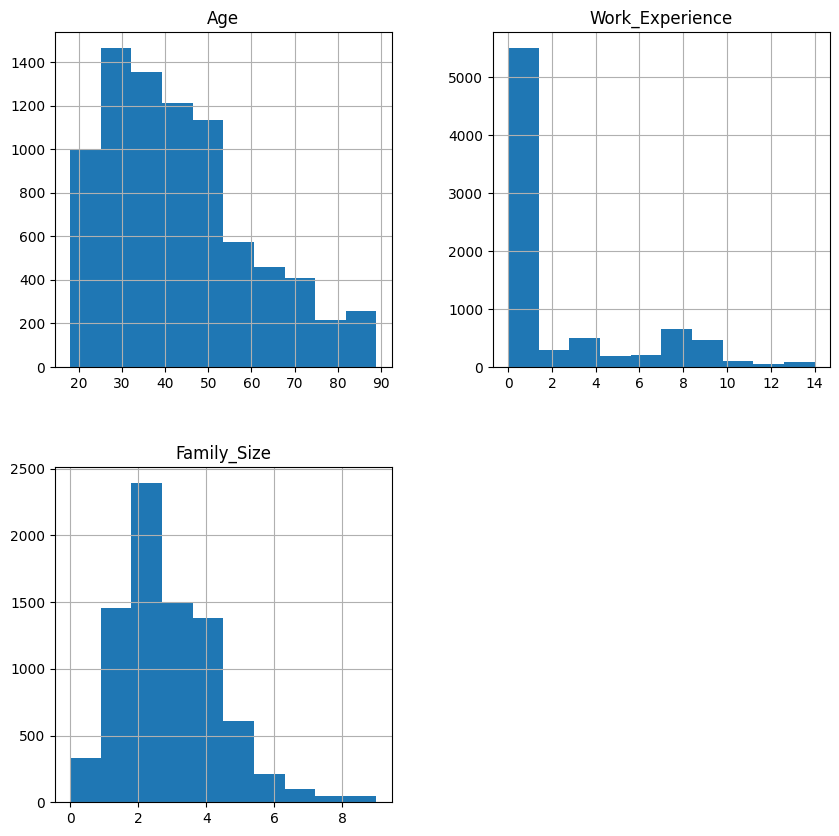

In [ ]:
#check distribution of data
df.hist(figsize=(10,10))
plt.show()

#EDA

#Nature of survey clients

In [ ]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

<Axes: title={'center': 'Gender'}, ylabel='Gender'>

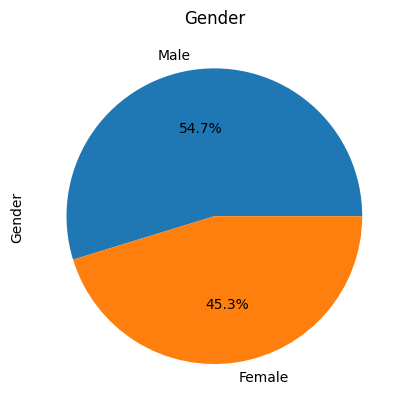

In [ ]:
df['Gender'].value_counts().plot(kind='pie',title='Gender',autopct='%0.1f%%')

In [ ]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
0       140
Name: Ever_Married, dtype: int64

<Axes: title={'center': 'Martial status'}, ylabel='Ever_Married'>

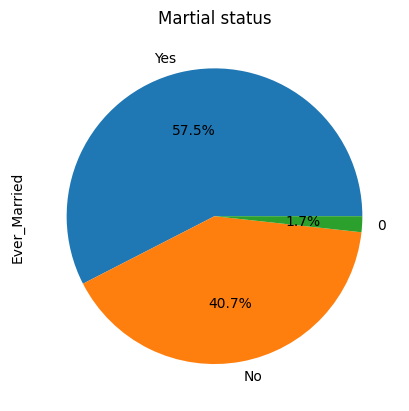

In [ ]:
df['Ever_Married'].value_counts().plot(kind='pie',title='Martial status',autopct='%0.1f%%')

In [ ]:
unique_ages = df['Age'].unique()
sorted_ages = np.sort(unique_ages)
sorted_ages

array([18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])

In [ ]:
df['Age'].value_counts()

35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

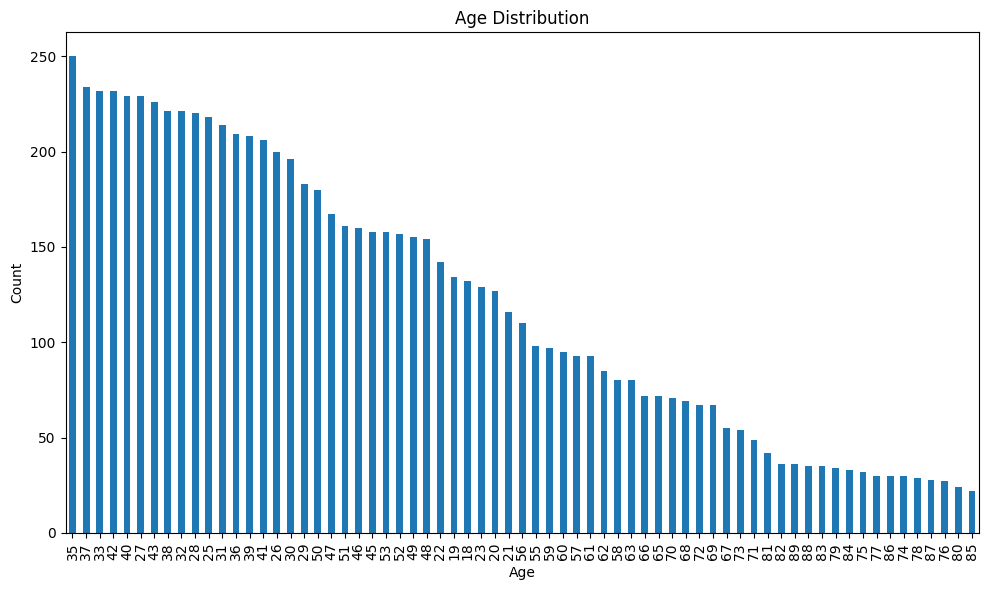

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
age_value_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

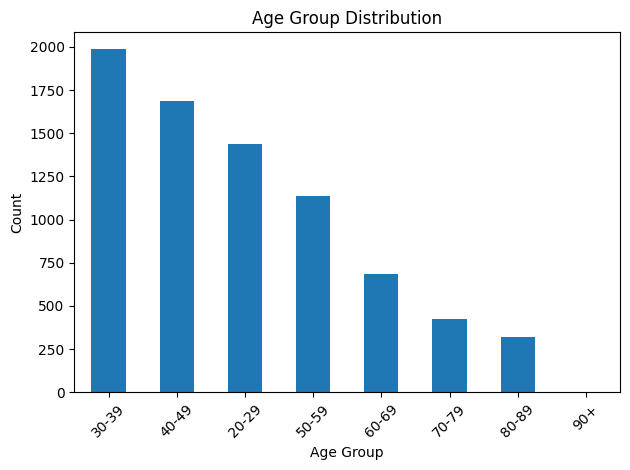

In [ ]:
# Define the age bins
bins = [20, 29, 39, 49, 59, 69, 79, 89, 100]

# Cut the 'Age' column into age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+'])

# Count the occurrences of each age group
age_group_counts = df['Age Group'].value_counts()

# Plot the result in a bar plot
ax = age_group_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Education'}, ylabel='Graduated'>

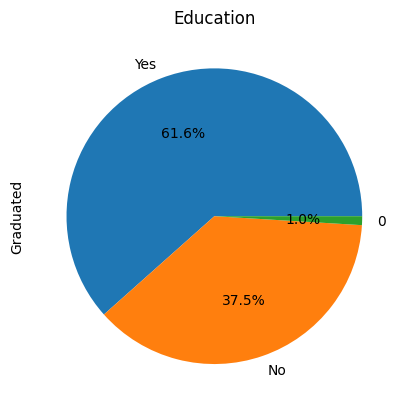

In [ ]:
df['Graduated'].value_counts().plot(kind='pie',title='Education',autopct='%0.1f%%')

In [ ]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
0                 124
Name: Profession, dtype: int64

In [ ]:
Profession_value_counts = df['Profession'].value_counts()

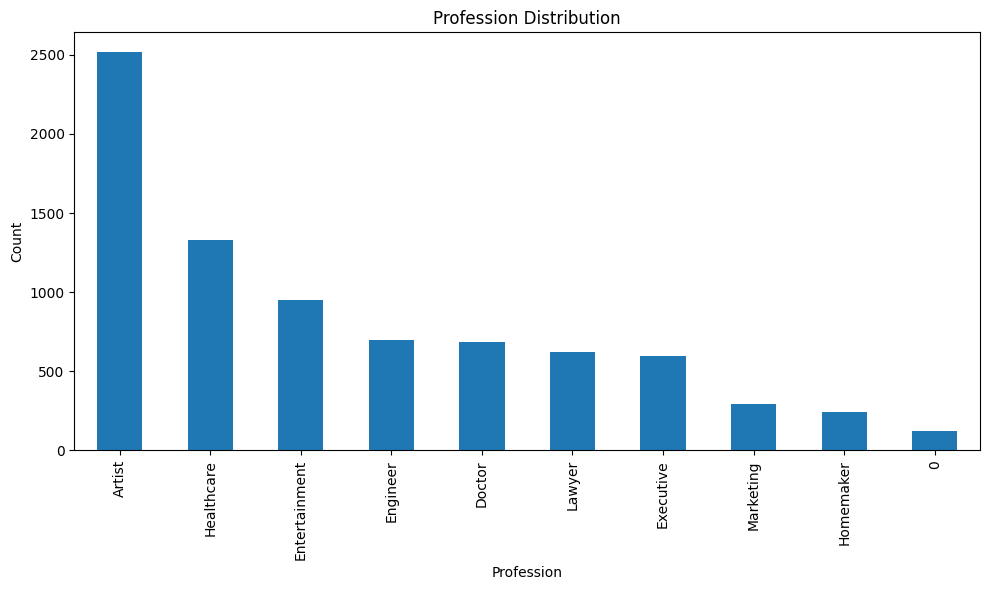

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
Profession_value_counts = df['Profession'].value_counts().plot(kind='bar')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['Work_Experience'].value_counts()

0.0     3147
1.0     2354
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [ ]:
Work_Experience = df['Work_Experience'].value_counts()

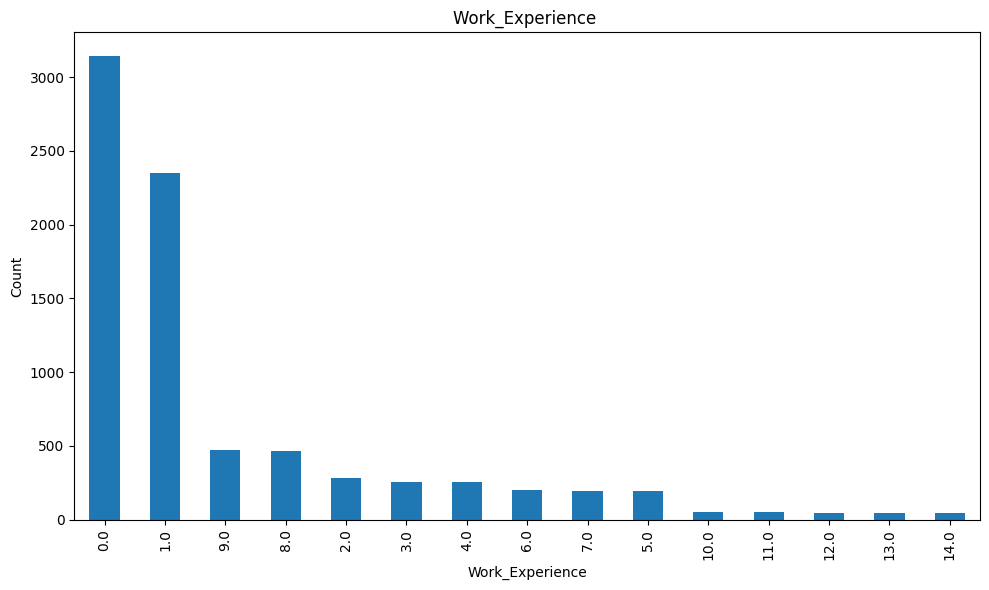

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
Work_Experience = df['Work_Experience'].value_counts().plot(kind='bar')
plt.xlabel('Work_Experience')
plt.ylabel('Count')
plt.title('Work_Experience ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [ ]:
Spending_Score = df['Spending_Score'].value_counts()

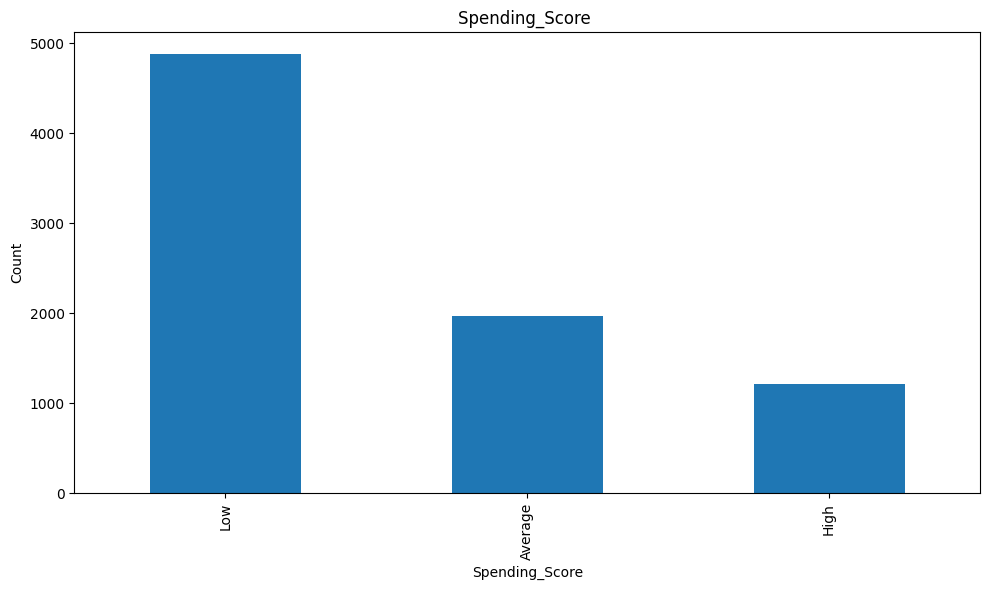

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
Spending_Score = df['Spending_Score'].value_counts().plot(kind='bar')
plt.xlabel('Spending_Score')
plt.ylabel('Count')
plt.title('Spending_Score ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
0.0     335
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

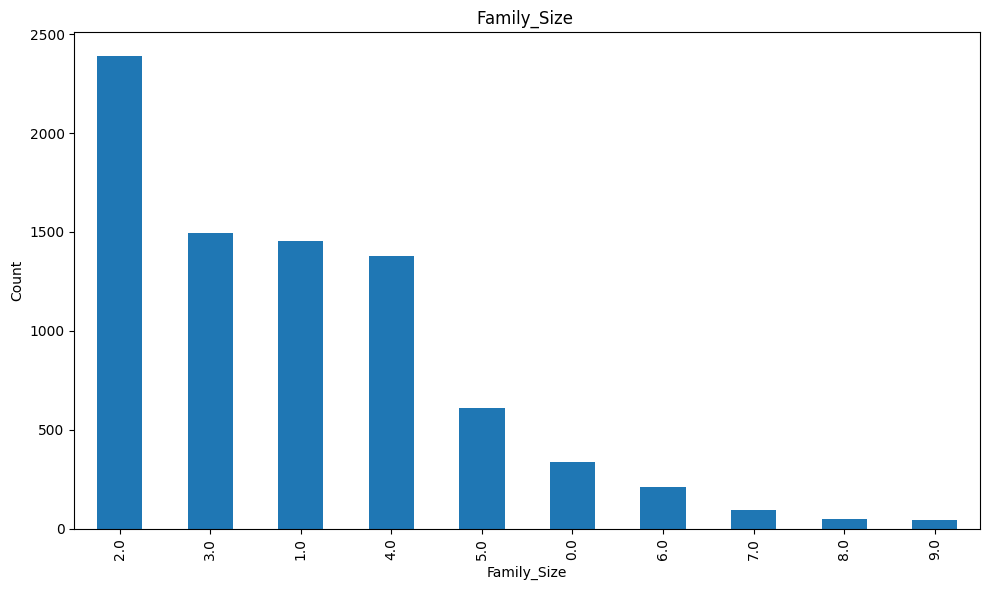

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
Family_Size = df['Family_Size'].value_counts().plot(kind='bar')
plt.xlabel('Family_Size')
plt.ylabel('Count')
plt.title('Family_Size ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

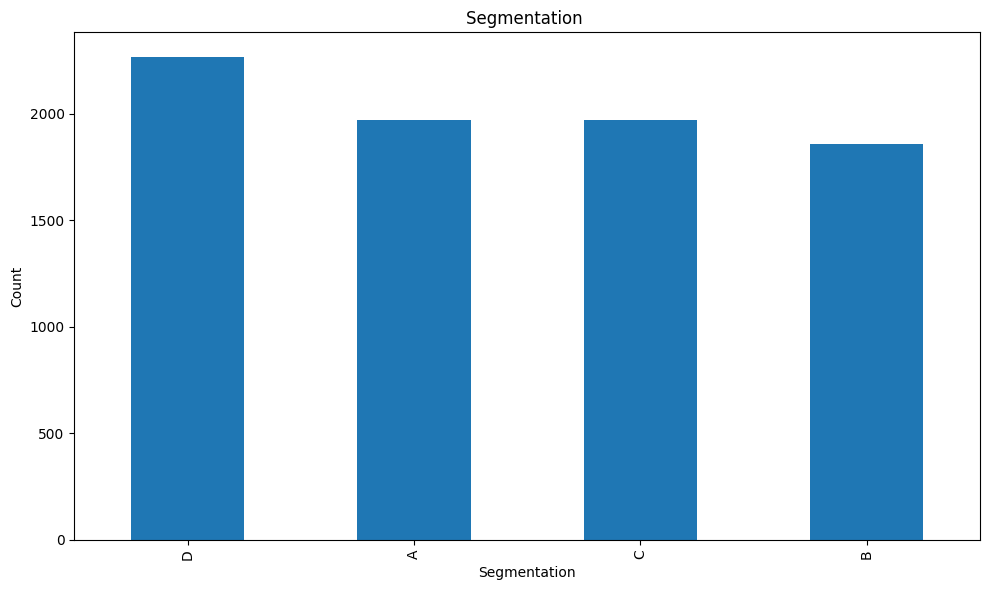

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
Segmentation = df['Segmentation'].value_counts().plot(kind='bar')
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title('Segmentation ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Characteristics of each group :

In [ ]:
import matplotlib.pyplot as plt

# Group data by 'Segmentation'
grouped_data = df.groupby('Segmentation')

# Explore attributes within each customer segment
for segment, group in grouped_data:
    print(f"Segment: {segment}")

    # Gender distribution
    gender_counts = group['Gender'].value_counts(normalize=True)
    print("Gender distribution:")
    print(gender_counts)

    # Age statistics
    age_stats = group['Age'].describe()
    print("Age statistics:")
    print(age_stats)

    # Education distribution
    education_counts = group['Graduated'].value_counts(normalize=True)
    print("Education distribution:")
    print(education_counts)

    print("-------------------")


Segment: A
Gender distribution:
Male      0.539047
Female    0.460953
Name: Gender, dtype: float64
Age statistics:
count    1972.000000
mean       44.924949
std        16.406909
min        18.000000
25%        33.000000
50%        41.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64
Education distribution:
Yes    0.618154
No     0.369675
0      0.012170
Name: Graduated, dtype: float64
-------------------
Segment: B
Gender distribution:
Male      0.536598
Female    0.463402
Name: Gender, dtype: float64
Age statistics:
count    1858.000000
mean       48.200215
std        14.806443
min        18.000000
25%        37.000000
50%        46.000000
75%        58.000000
max        89.000000
Name: Age, dtype: float64
Education distribution:
Yes    0.716900
No     0.273412
0      0.009688
Name: Graduated, dtype: float64
-------------------
Segment: C
Gender distribution:
Male      0.53198
Female    0.46802
Name: Gender, dtype: float64
Age statistics:
count    1970.000000


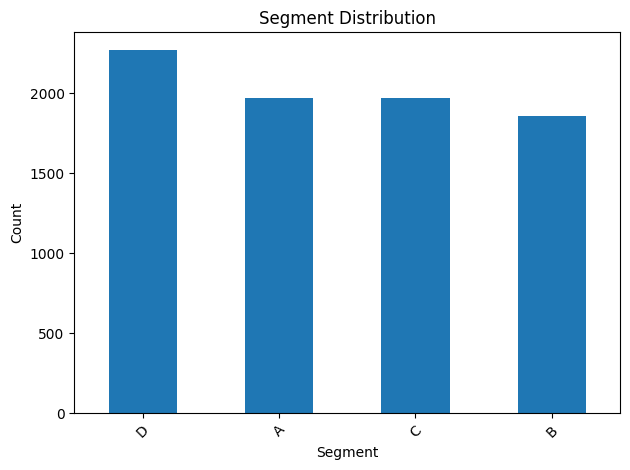

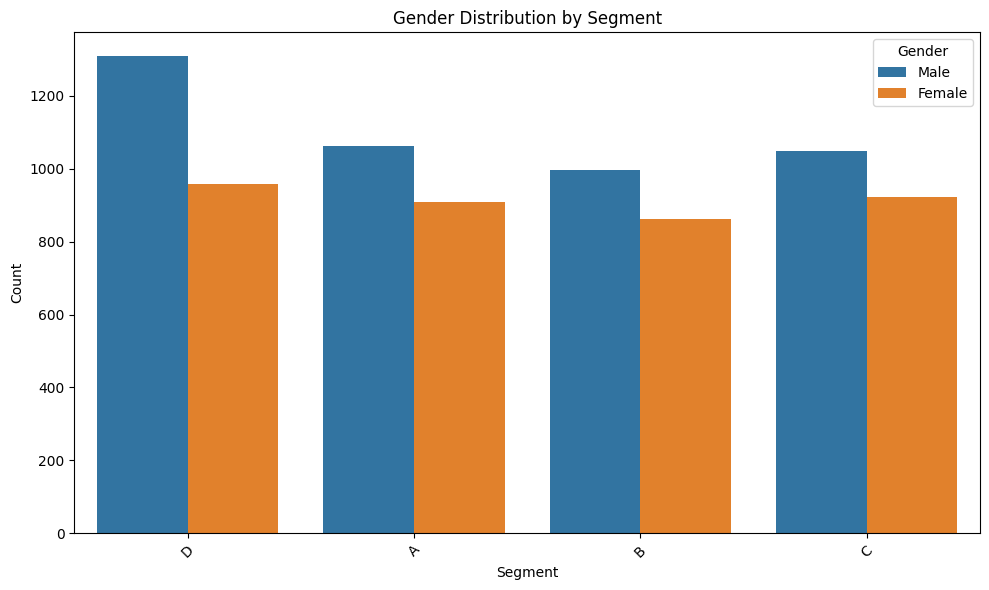

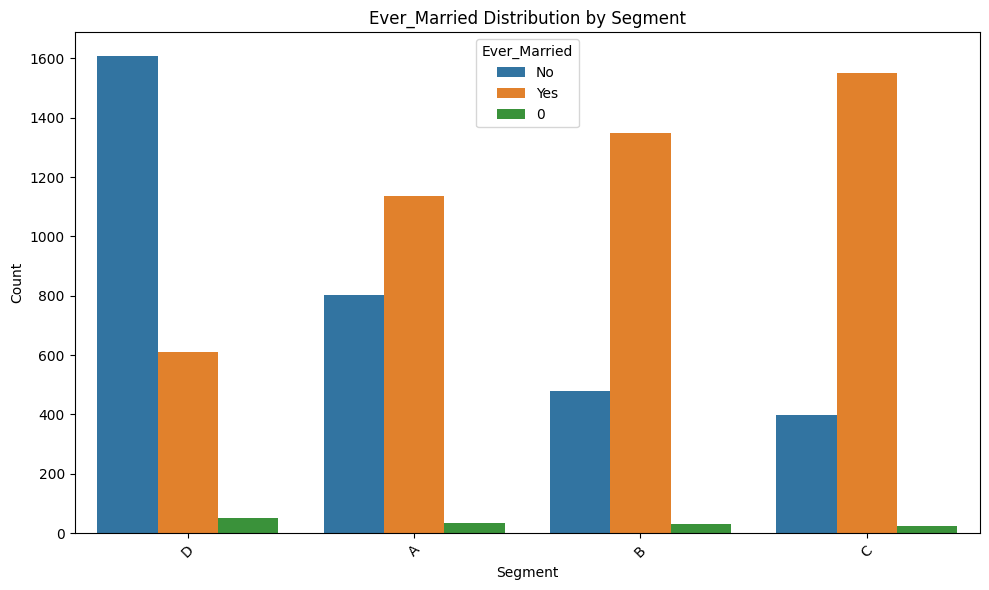

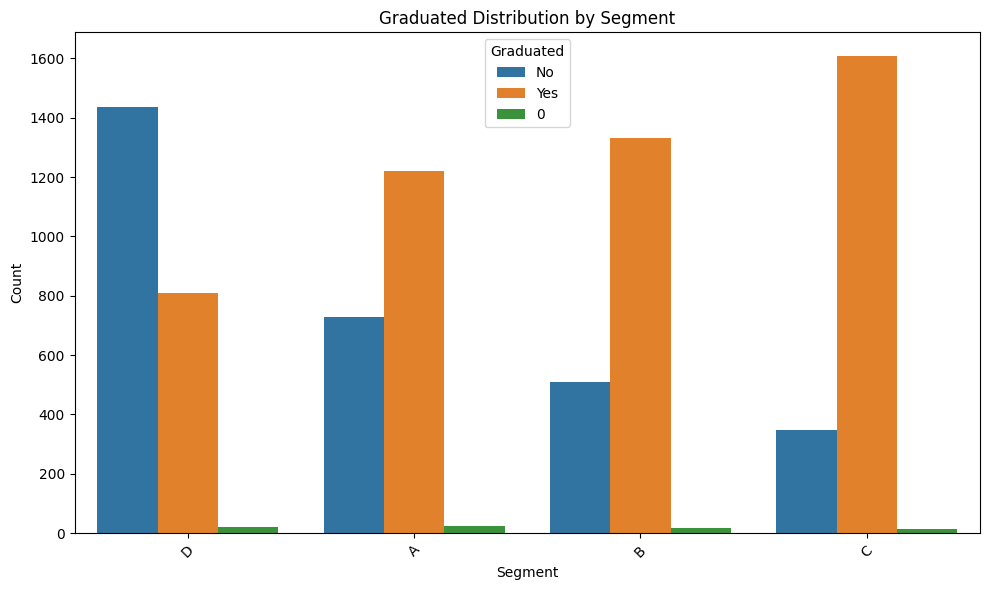

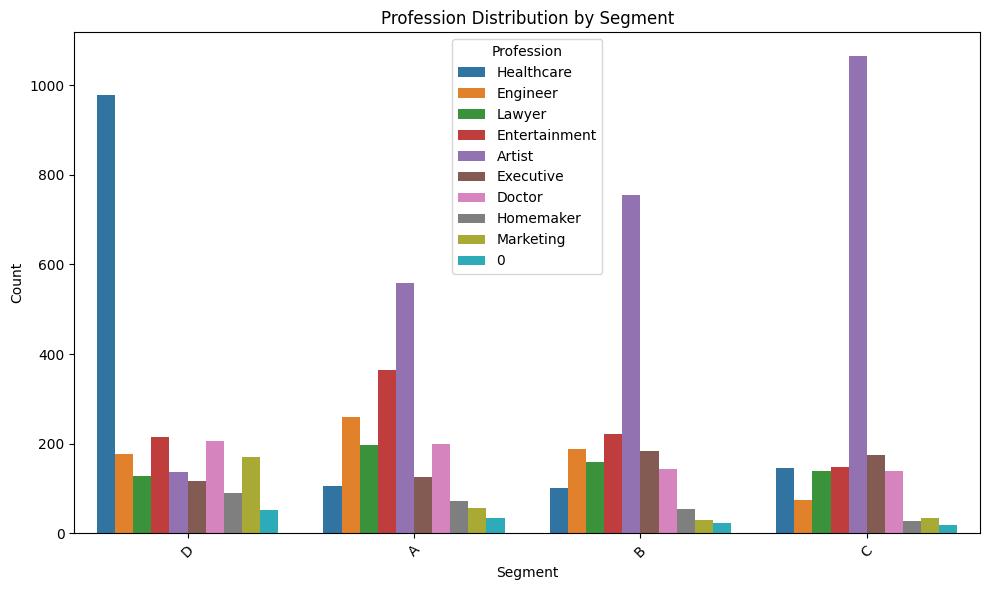

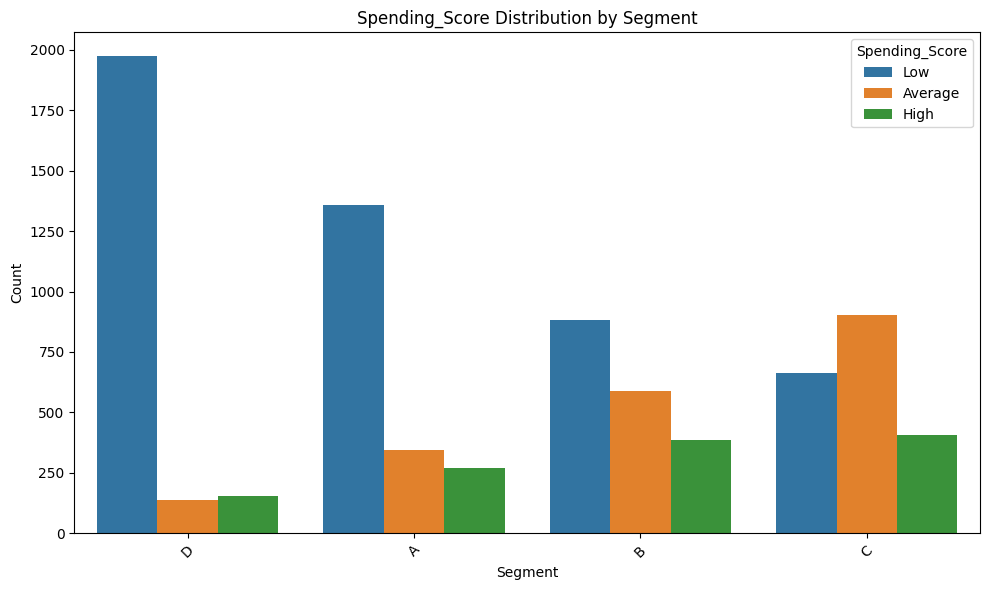

In [ ]:
# Explore segment composition
segment_counts = df['Segmentation'].value_counts()
segment_counts.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze characteristics of each segment
categorical_attributes = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

for attribute in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Segmentation', hue=attribute)
    plt.xlabel('Segment')
    plt.ylabel('Count')
    plt.title(f'{attribute} Distribution by Segment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title=attribute)
    plt.show()

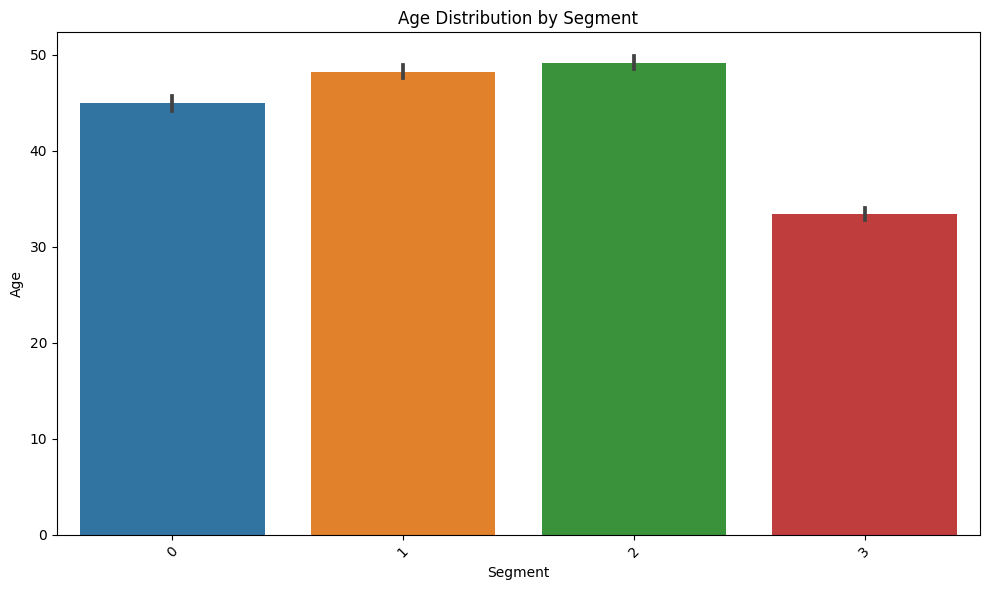

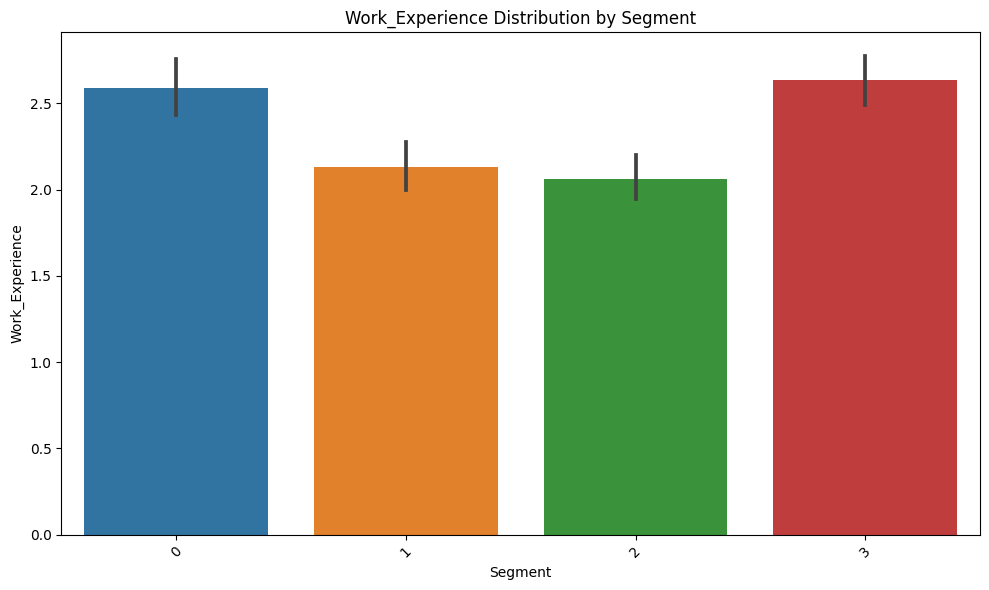

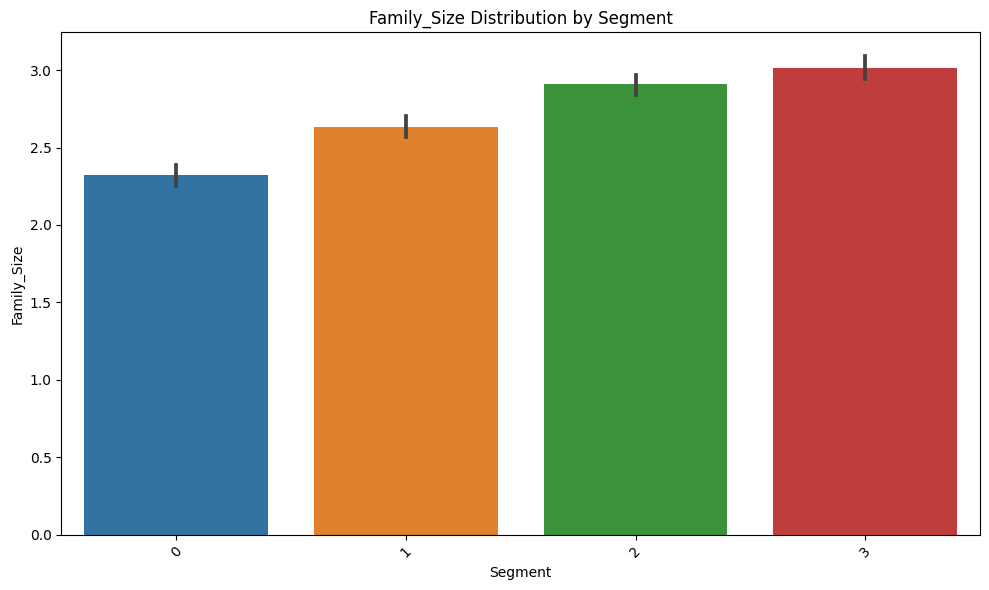

In [65]:
# Analyze characteristics of each segment
attributes = [ 'Age','Work_Experience', 'Family_Size']

for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Segmentation', y=attribute)
    plt.xlabel('Segment')
    plt.ylabel(attribute)
    plt.title(f'{attribute} Distribution by Segment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Feature Engineering

In [73]:
from sklearn.preprocessing import LabelEncoder

# Convert all categorical columns to strings
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Segmentation']
df[categorical_columns] = df[categorical_columns].astype(str)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

#Build ML Model

In [75]:
X = df.drop(['Segmentation'], axis=1)
y = df['Segmentation']

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


 97%|█████████▋| 28/29 [00:28<00:01,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 6454, number of used features: 8
[LightGBM] [Info] Start training from score -1.406643
[LightGBM] [Info] Start training from score -1.466595
[LightGBM] [Info] Start training from score -1.400966
[LightGBM] [Info] Start training from score -1.280252


100%|██████████| 29/29 [00:28<00:00,  1.00it/s]


In [81]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.52               0.51    None      0.51   
LGBMClassifier                     0.52               0.50    None      0.51   
XGBClassifier                      0.51               0.50    None      0.50   
NuSVC                              0.51               0.49    None      0.50   
AdaBoostClassifier                 0.50               0.49    None      0.49   
RandomForestClassifier             0.48               0.47    None      0.48   
KNeighborsClassifier               0.48               0.47    None      0.49   
QuadraticDiscriminantAnalysis      0.49               0.47    None      0.47   
LabelSpreading                     0.47               0.47    None      0.47   
NearestCentroid                    0.48               0.46    None      0.47   
LabelPropagation                   0.47 

In [82]:
from sklearn.svm import SVC

In [83]:
# Create and train the SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [84]:
# Predict the target values on the test set
y_pred = svc_model.predict(X_test)

# Measure accuracy of model

In [85]:
from sklearn.metrics import confusion_matrix

In [87]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)


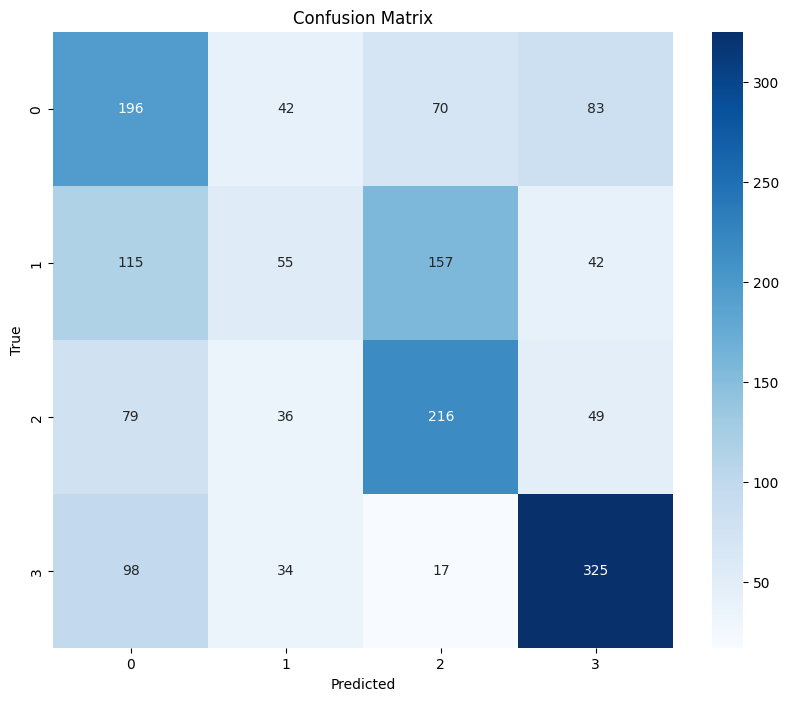

In [90]:
# Visualize confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=svc_model.classes_, yticklabels=svc_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [94]:
from sklearn.metrics import recall_score , precision_score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f'precision = {precision}')
print(f'recall = {recall}')

precision = 0.4629621210573224
recall = 0.4761013309909548


#loading test data

In [115]:
CS_test_data = pd.read_csv('/content/drive/My Drive/Dataset/CS_Test.csv')


In [117]:
ID = CS_test_data['ID']


#processing test data

In [118]:
CS_test_data = CS_test_data.drop(['ID', 'Var_1'], axis=1)

In [124]:
from sklearn.preprocessing import LabelEncoder

# Convert all categorical columns to strings
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
CS_test_data[categorical_columns] = CS_test_data[categorical_columns].astype(str)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features
for column in categorical_columns:
    CS_test_data[column] = label_encoder.fit_transform(CS_test_data[column])

In [125]:
CS_test_data = CS_test_data.fillna(0)

In [126]:
CS_test_data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,2,36,2,3,0.00,2,1.00
1,1,2,37,2,6,8.00,0,4.00
2,0,2,69,1,0,0.00,2,1.00
3,1,2,59,1,5,11.00,1,2.00
4,0,1,19,1,9,0.00,2,4.00
...,...,...,...,...,...,...,...,...
2622,1,1,29,1,6,9.00,2,4.00
2623,0,1,35,2,2,1.00,2,1.00
2624,0,1,53,2,4,0.00,2,2.00
2625,1,2,47,2,5,1.00,1,5.00


In [127]:
pred = svc_model.predict(CS_test_data)

In [128]:

data={'Id': ID, 'Class':pred }
sub = pd.DataFrame(data=data)

In [129]:
sub

,Id,Class
0,458989,0
1,458994,3
2,458996,2
3,459000,2
4,459001,3
...,...,...
2622,467954,3
2623,467958,0
2624,467960,1
2625,467961,2
